# HW1_SnDA 2020/2021

### IDs:
Insert yours IDs to the cell below

ID #1: 311132468

ID #2: 203909320


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from  statistics import median
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = (8.0,6.0) 

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

63

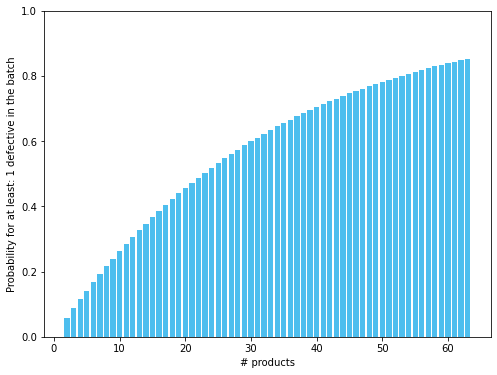

In [2]:
def find_defect(prob_def_samp=0.03,given_prob=0.85,at_least=1):
    n = at_least
    p = 0
    sig =0
    dict_d={}
    while p < given_prob:
        n+=1
        for i in range(at_least):
            sig+=special.binom(n,i)*(prob_def_samp**i)*((1-prob_def_samp)**(n-i))
        p = 1-sig #applying CCDF
        sig = 0
        plt.bar(n,p,label= n, color='#4DBEEE')
    plt.ylim([0,1.0])
    plt.xlabel("# products")
    plt.ylabel(("Probability for at least: {0} defective in the batch".format(at_least)))
    return n
find_defect()

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

74

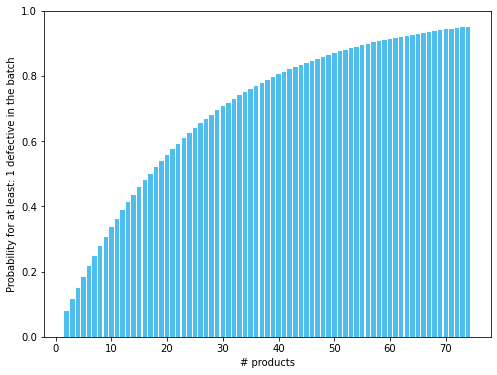

In [3]:
find_defect(0.04,0.95)

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

78

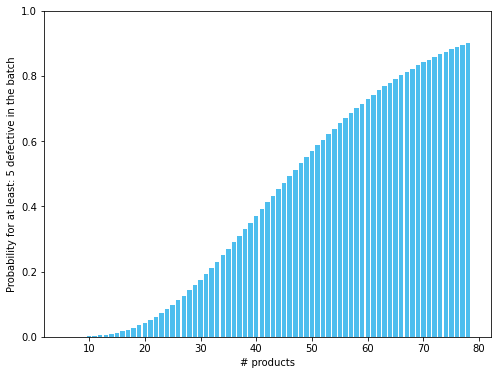

In [4]:
find_defect(0.1,0.9,5)

64

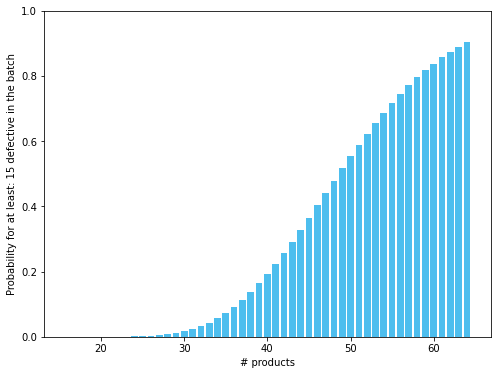

In [5]:
find_defect(0.3,0.9,15)

In [6]:
print(1-stats.binom.cdf(4,78,0.1))
one_minus_cdf = lambda x, n,p: 1-stats.binom.cdf(x,n,p)
print(one_minus_cdf(4,78,0.1))

0.9006056767326885
0.9006056767326885


In [7]:
x = stats.binom.cdf(4,78,0.1)
one_minus_cdf = lambda x, n,p: 1-stats.binom.cdf(x,n,p)
print(one_minus_cdf(4,78,0.1))
y = stats.binom.cdf(14,64,0.3)
one_minus_cdf = lambda y, n,p: 1-stats.binom.cdf(y,n,p)
print(one_minus_cdf(14,64,0.3))

0.9006056767326885
0.9025706028157258


prob_def_samp=0.1,at_least=5:	mean:0.6363891638034402	var:0.12430465246347779
prob_def_samp=0.3,at_least=15:	mean:0.6317855031116448	var:0.16482685568092692


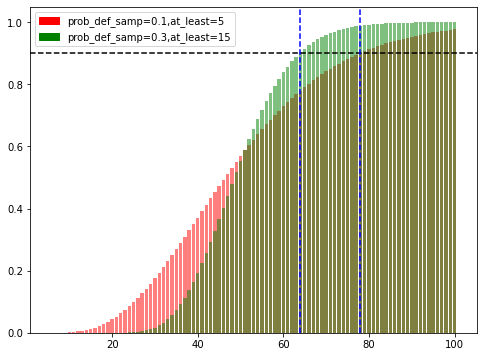

In [8]:
import matplotlib.patches as mpatches
def dict_defect(prob_def_samp=0.03,given_prob=0.85,at_least=1,loc=1):
    n = at_least
    p = 0
    sig =0
    dict_d={}
    while n != 100:
        n+=1
        for i in range(at_least):
            p=1-stats.binom.cdf(i,n,prob_def_samp)
            dict_d[n]=p
    return dict_d

plt.bar(dict_defect(0.1,0.9,5,1).keys(), dict_defect(0.1,0.9,5,1).values(), color='r',alpha=.5)
plt.bar(dict_defect(0.3,0.9,15,3).keys(), dict_defect(0.3,0.9,15,3).values(), color='g',alpha=.5) 
plt.axhline( y=0.9,color='black',linestyle="dashed")
plt.axvline( x=64,color='blue',linestyle="dashed")
plt.axvline( x=78,color='blue',linestyle="dashed")
plt.legend(handles=[mpatches.Patch(color='red', label='prob_def_samp=0.1,at_least=5'),mpatches.Patch(color='green', label='prob_def_samp=0.3,at_least=15')])

x=(list(dict_defect(0.1,0.9,4,1).values()))
y=(list(dict_defect(0.3,0.9,14,3).values()))
print("prob_def_samp=0.1,at_least=5:\tmean:{0}\tvar:{1}\nprob_def_samp=0.3,at_least=15:\tmean:{2}\tvar:{3}".format(np.mean(x),np.var(x),np.mean(y),np.var(y)))

from the first example we get$$P(X≥5)=1-\sum_{k=1}^{n=4}\binom{n}{k} p^k(1-p)^{n-k}=1-\sum_{k=1}^{n=4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.9 $$$$\sum_{k=1}^{n=4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.1$$




From the second example we get:$$P(X≥15)=1-\sum_{k=1}^{n=14}\binom{n}{k} p^k(1-p)^{n-k}=1-\sum_{k=1}^{n=14}\binom{n}{k} 0.3^k(0.7)^{n-k}=0.9$$

$$\sum_{k=1}^{n=14}\binom{n}{k} 0.3^k(0.7)^{n-k}=0.1 $$
we expecting to see a smaller value for "n" since we have in the second example 3 times grather defective then the first example, when we enlarge the probability by 3, less samples required
in order to find the defective products. 
more variance in 1.B.3, so more probabilty mass goes to the extremes



$$E(X) = np$$<br>
$$VAR(X)=E(X^2) − E(X)^2 = E[X(X − 1)]+ E(X) − E(X)^2 = n(n − 1)p^2 + np − (np)^2= np(1-p)$$


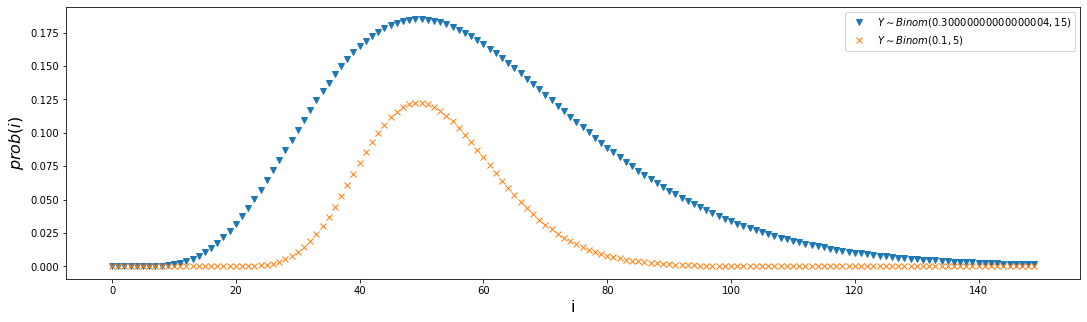

In [9]:
k = 5
p = 0.1
m=3
n = np.arange(0,k*m/p)

binomial_1 =stats.binom.pmf(k,n,p)
binomial_2 =stats.binom.pmf(k*m,n,p*m)
plt.figure(figsize=(40,5))
plt.subplot(1,2,1)
plt.plot(n, binomial_1, 'v', label = "$Y\sim Binom({{{0}}},{{{1}}})$".format(p*m, k*m))
plt.plot(n, binomial_2, 'x', label = "$Y\sim Binom({{{0}}},{{{1}}})$".format(p, k))
plt.xlabel("i",fontsize = 16)
plt.ylabel('$prob(i)$', fontsize=16)
plt.legend()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

##**Solving approach explanation** 
### for Q2

The approach we decided to take in this specific question was a rather unique mathematical way - optimization minimization problem given subjected constraints.
we used SciPy Optimize library and dןvided into 3 "modes" when each "mode" solves different optimization problem.
the reason that optimization solving works here and generates different sample for each iteration is the fact that we are trying to solve NonLinear Optimization problem with initial solutions. and for these kind of problems - the solver takes an initial guessed solution and then finds LOCAL_MINIMA and that is the reason that this mathematical methods generates each iteration different solution with given constraints.
we solved a mathematical problem for a SAMPLE solely and then multiplied the sample to get a population. 

**first mode -> "caged": fully constrained solution**

\begin{equation*}
\begin{aligned}
& \underset{xi}{\text{minimize}}
& & \hspace{0.8cm}\sum_{i=1}^{sample} X_i\\
& \text{subject to}
& & 1)\hspace{0.5cm} \frac{\sum_{i=1}^{sample} X_i}{n} \leq  \bar{y}, \; i = 1, \ldots, sample.size\\
& & & 2)\hspace{0.5cm}median(X_i) \leq \tilde{y}, \; i = 1, \ldots, sample.
size\\
& & & 3)\hspace{0.5cm}Q_{0.75}(X_i)-Q_{0.25}(X_i)\geq IQR(y) + Const, \; i = 1, \ldots,sample.\\
& & & 4)\hspace{0.5cm}Var(X_i)\leq S(y)^2, \; i = 1, \ldots,sample.\\
\end{aligned}
\end{equation*}

**second mode -> "reg": regular constrained solution - mean and median only**

\begin{equation*}
\begin{aligned}
& \underset{xi}{\text{minimize}}
& & \hspace{0.8cm}\sum_{i=1}^{sample} X_i\\
& \text{subject to}
& & 1)\hspace{0.5cm} \frac{\sum_{i=1}^{sample} X_i}{n} \leq  \bar{y}, \; i = 1, \ldots, sample.size\\
& & & 2)\hspace{0.5cm}median(X_i) \leq \tilde{y}, \; i = 1, \ldots, sample.
size\\
\end{aligned}
\end{equation*}

**third  mode -> "covar": connect and create a relationship between X and y by subjecting an empirical covariance constrain**

\begin{equation*}
\begin{aligned}
& \underset{xi}{\text{minimize}}
& & \hspace{0.8cm}\sum_{i=1}^{sample} X_i\\
& \text{subject to}
& & 1)\hspace{0.5cm} \frac{\sum_{i=1}^{sample} X_i}{n} \leq  \bar{y}, \; i = 1, \ldots, sample.size\\
& & & 2)\hspace{0.5cm}median(X_i) \leq \tilde{y}, \; i = 1, \ldots, sample.
size\\
& & & 3)\hspace{0.5cm}Cov(X_i,y)\leq \alpha * \sqrt{Var(X_i)} * \sqrt{Var(y)}
\
\end{aligned}
\end{equation*}

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [10]:
def generate_sample(samp_size, avg,med,c=0,min_iqr=0,vari=0,data=0,alpha=0,mode = "reg"): #generating a sample of  floats which answer specific constraints such as specific mean, median, IQR, var, covar
    a = None
    if mode == "caged": # optimization "caged" mode means that i solve opt' problem with maximum constraints such as mean,median,iqr,variance
        def objective(x,avg,med,min_iqr,vari,c):
            return x.sum()
        def constraint_avg(x):
            return x.mean() - avg
        def constraint_med(x):
            return np.median(x) - med
        def constraint_iqr(x):
            return -stats.iqr(x)+ min_iqr+c
        def constraint_var(x):
            return x.var() -vari 
        cons = [{'type':'eq', 'fun': constraint_avg},{'type':'eq', 'fun': constraint_med},{'type':'ineq', 'fun': constraint_iqr},{'type':'ineq', 'fun': constraint_var},]
        bounds = [(0, None)]
        bounds*= samp_size  # in this kind of nonlinear optimization, the final solution locate local minima,and therefore affected by intial solution     
        result = minimize( objective,np.random.randint(100,10000, size=samp_size).tolist(), constraints=cons,args=(avg,med,min_iqr,vari,c),bounds=bounds)
        a = np.array(result.x)
    if mode == "reg":  # optimization "reg" (regular) mode means that i solve opt' problem with minimum constrains - only mean and avg
        def objective(x,avg,med):
            return x.sum()
        def constraint_avg(x):
            return x.mean() - avg
        def constraint_med(x):
            return np.median(x) - med
        cons = [{'type':'eq', 'fun': constraint_avg},{'type':'eq', 'fun': constraint_med}]
        bounds = [(0, None)]
        bounds*= samp_size
        result = minimize( objective,np.random.randint(100,10000, size=samp_size).tolist(), constraints=cons,args=(avg,med),bounds=bounds)
        a = np.array(result.x)
    if mode == "covar":  # optimization "covar"  mode means that i add a constrain on the covariance and for that i get an input of alpha and additional data
        def objective(x,avg,med,data,alpha):
            return x.sum()
        def constraint_avg(x):
            return x.mean() - avg
        def constraint_med(x):
            return np.median(x) - med
        def constraint_covar(x):
            return np.cov(x, data)[0][1] - alpha * (np.var(x)**0.5) * (np.var(data)**0.5)
        # in this kind of nonlinear optimization, the final solution locate local minima,and therefore affected by intial solution
        cons = [{'type':'eq', 'fun': constraint_avg},{'type':'eq', 'fun': constraint_med},{'type':'eq', 'fun': constraint_covar}]
        bounds = [(0, None)]
        bounds*= samp_size
        result = minimize( objective,np.random.randint(100,10000, size=samp_size).tolist(), constraints=cons,args=(avg,med,data,alpha),bounds=bounds)
        a = np.array(result.x)
    return a


In [11]:
def round_to_mean(a): # a function who gets a float sample, rounds it, and add/reduce ones in order to *try* to converge to the floats mean value
    b = np.round(a,0).copy()
    if b.mean() > a.mean() :
        b[0]-=1
        if abs(b.mean()-a.mean()) >0.0000001:
            b[-1]-=1
            return b
        return b
    else:
        b[0]+=1
        if abs(b.mean()-a.mean()) >0.0000001:
            b[-1]+=1
            return b
        return b
    return b

In [12]:
def generate_int_sample(samp_size, avg,med,c=0,min_iqr=0,vari=0,data=0,alpha=0,mode = "reg"): #taking the floats generated from generate_sample and round them such that the mean is preserved
    flag = False
    num = 0
    while flag!= True and num< 1000:
        sample = generate_sample(samp_size, avg,med,c,min_iqr,vari,data,alpha,mode)
        sample_int = round_to_mean(sample)
        sample_int_mean = sample_int.mean()
        if abs(avg-sample_int_mean)< 0.0001: #  we demand really small epsilon from the mean
            flag = True
        num+=1
    if num == 1000:
        print("NO convergence")
        return None
    return sample_int

In [13]:

def create_hist(lis,population,town,num_title,detail = True):
    prop=int(population/lis.size) 
    lis = lis.tolist()
    lis*=prop
    data = pd.DataFrame(lis)
    if detail:
        med = data.median()
        mean = data.mean()
        iqr = stats.iqr(data)
        var = round(data.var(),3)
        print("{0}, Scenario {1}".format(town,num_title))
        print("Median:{0}\nMean:{1}\nIQR:{2}\nVariance:{3}".format(med[0],mean[0],iqr,var[0]))
        print("*"*30)
    return data

In [14]:
#generate_int_sample(samp_size, avg,med,c=0,min_iqr=0,vari=0,data=0,alpha=0,mode = "reg")
def Generate_higher_iqr(samp_size,SH_1,RG_1,iqr_sh,iqr_rg,const): # a function to iterate of generatation of higher iqr , because this constrain might diverge from time to time in nonlinear with first guessed solutions optimizations
    while (stats.iqr(SH_1) < stats.iqr(RG_1)) == False:
        SH_1 = generate_int_sample(samp_size,6300,4600,min_iqr = iqr_sh, mode = "caged")
        RG_1 = generate_int_sample(samp_size,4200,4600,c=const,min_iqr =iqr_rg, mode = "caged")
    return SH_1,RG_1


In [15]:
#Generate the data for 2.A:
SH = generate_int_sample(40,6300,4600,min_iqr =800,mode = "caged")
RG =  generate_int_sample(40,4200,4600,c = 500,min_iqr =2000,mode = "caged")
SH_1,RG_1= Generate_higher_iqr(40,SH,RG,800,2000,500)
SH = generate_int_sample(20,6300,4600,min_iqr =600,mode = "caged")
RG =  generate_int_sample(20,4200,4600,c = 500,min_iqr =2000,mode = "caged")
SH_2,RG_2= Generate_higher_iqr(20,SH,RG,600,2000,500)

In [16]:
sh1=create_hist(SH_1,16000,"SH","1")
rg1=create_hist(RG_1,22000,"RG","1")
print("Does IQR of rent in RG is higher? **{0}**".format(stats.iqr(rg1) > stats.iqr(sh1)))

SH, Scenario 1
Median:4600.0
Mean:6300.0
IQR:798.25
Variance:10989838.665
******************************
RG, Scenario 1
Median:4600.0
Mean:4200.0
IQR:2500.25
Variance:7689386.718
******************************
Does IQR of rent in RG is higher? **True**


Text(0, 0.5, 'cumulative Rent')

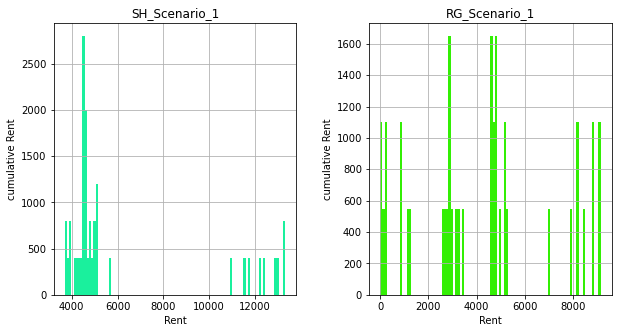

In [17]:
#plotting the first scenario
fig, ax =plt.subplots(1,2,figsize = (10,5))
sh1.hist(bins=100,linewidth=1,color=np.random.rand(3),ax=ax[0])
ax[0].set_title("SH_Scenario_1")
ax[0].set_xlabel('Rent')
ax[0].set_ylabel('cumulative Rent')
rg1.hist(bins=100, figsize=(9,9),linewidth=1,color=np.random.rand(3),ax=ax[1])
ax[1].set_title("RG_Scenario_1")
ax[1].set_xlabel('Rent')
ax[1].set_ylabel('cumulative Rent')

In [18]:
sh2=create_hist(SH_2,16000,"SH","2")
rg2=create_hist(RG_2,22000,"RG","2")
print("Does IQR of rent in RG is higher? **{0}**".format(stats.iqr(rg2) > stats.iqr(sh2)))   

SH, Scenario 2
Median:4600.0
Mean:6300.0
IQR:599.25
Variance:13435687.03
******************************
RG, Scenario 2
Median:4600.0
Mean:4200.0
IQR:2454.75
Variance:6474781.008
******************************
Does IQR of rent in RG is higher? **True**


Text(0, 0.5, 'cumulative Rent')

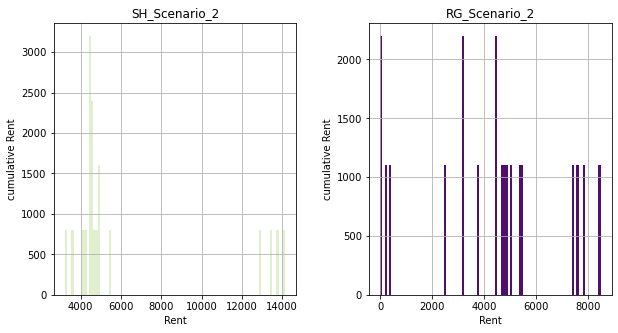

In [19]:
#plotting the second scenario
fig, ax =plt.subplots(1,2,figsize = (10,5))
sh2.hist(bins=100,linewidth=1,color=np.random.rand(3),ax=ax[0])
ax[0].set_title("SH_Scenario_2")
ax[0].set_xlabel('Rent')
ax[0].set_ylabel('cumulative Rent')
rg2.hist(bins=100, figsize=(9,9),linewidth=1,color=np.random.rand(3),ax=ax[1])
ax[1].set_title("RG_Scenario_2")
ax[1].set_xlabel('Rent')
ax[1].set_ylabel('cumulative Rent')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [20]:

def Generate_higher_variance(samp_size,SH_3,RG_3):# a function to iterate  generation of higher iqr & higher variance for SH , because this constrains might diverge from time to time in nonlinear with first guessed solutions optimizations
    while (np.var(SH_3) > np.var(RG_3)) == False or (stats.iqr(SH_3) < stats.iqr(RG_3)) == False:
        SH_1 = generate_int_sample(samp_size,6300,4600,min_iqr = 600,mode = "caged")
        RG_1 = generate_int_sample(samp_size,4200,4600,c=500,min_iqr =2000, mode = "caged")
    return SH_3,RG_3

In [21]:
#Generate the data for 2.B:
SH = generate_int_sample(25,6300,4600,min_iqr = 600, mode = "caged")
RG =  generate_int_sample(25,4200,4600,c=500,min_iqr =2000, mode = "caged")
SH_3,RG_3= Generate_higher_variance(25,SH,RG)

In [22]:
sh3=create_hist(SH_3,16000,"SH","3")
rg3=create_hist(RG_3,22000,"RG","3")
print("Is rent in SH has a higher variance than the rent in RG? **{0}**".format(sh3.var()[0] > rg3.var()[0]))     

SH, Scenario 3
Median:4600.0
Mean:6300.0
IQR:600.0
Variance:10421390.537
******************************
RG, Scenario 3
Median:4600.0
Mean:4200.0
IQR:2500.0
Variance:6780256.113
******************************
Is rent in SH has a higher variance than the rent in RG? **True**


Text(0, 0.5, 'cumulative Rent')

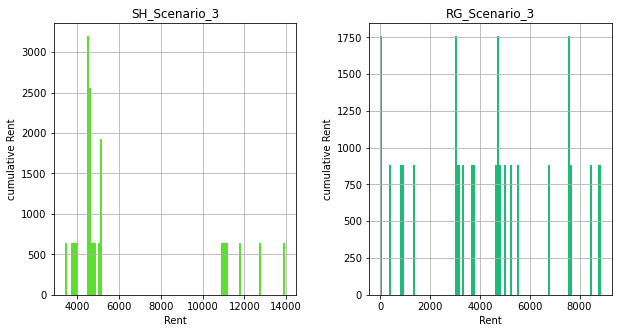

In [23]:
#plotting the third scenario
fig, ax =plt.subplots(1,2,figsize = (10,5))
sh3.hist(bins=100,linewidth=1,color=np.random.rand(3),ax=ax[0])
ax[0].set_title("SH_Scenario_3")
ax[0].set_xlabel('Rent')
ax[0].set_ylabel('cumulative Rent')
rg3.hist(bins=100, figsize=(9,9),linewidth=1,color=np.random.rand(3),ax=ax[1])
ax[1].set_title("RG_Scenario_3")
ax[1].set_xlabel('Rent')
ax[1].set_ylabel('cumulative Rent')

SH: 16,000, 6300RCU, median 4600RCU

RG:22,000, 4200RCU,median 4600RCU
* The IQR of the rent is smaller in SH than in RG.


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [24]:
calc_covar = 3
emp_covar = 2
while (100*calc_covar/emp_covar) > 101 or (100*calc_covar/emp_covar) < 99: #generate population until you less than 1% deviation
    RENT_SH = generate_int_sample(100,6300,4600,min_iqr = 600, mode = "caged")
    PHIֹ_SH = generate_int_sample(100,12500,12000,data=RENT_SH,alpha=0.97,mode = "covar")
    sh_rent=create_hist(RENT_SH,16000,"SH","Rent",detail=False)
    sh_phi=create_hist(PHIֹ_SH,16000,"SH","PHI",detail=False)
    sh_tot = pd.concat([sh_rent, sh_phi], axis=1)
    sh_tot.columns = ["rent","phi"]
    calc_covar = sh_tot.rent.cov(sh_tot.phi)
    emp_covar = np.round(0.97 * (np.var(sh_rent)**0.5) * (np.var(sh_phi)**0.5),3)[0]

In [25]:
print("The calculated covariance is {0:.2f}".format(calc_covar))
print("The empirical given covariance is {0:.2f}".format(emp_covar))
print("The covariances deviate from each other by {0:.6f}% < 1%".format(100-100*calc_covar/emp_covar))

The calculated covariance is 6308377.49
The empirical given covariance is 6371747.04
The covariances deviate from each other by 0.994540% < 1%


Text(0, 0.5, 'Cumulative')

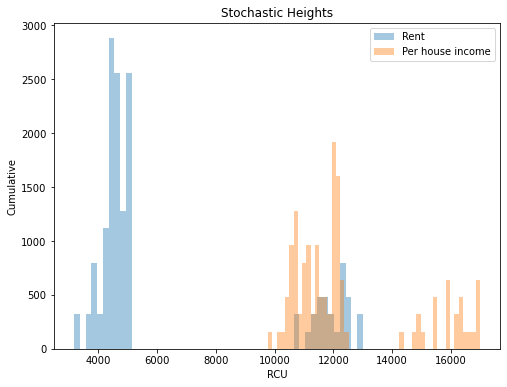

In [26]:
sns.distplot(sh_tot['rent'],  kde=False, label='Rent')
sns.distplot(sh_tot['phi'],  kde=False, label='Per house income')
plt.legend(prop={'size': 10})
plt.title('Stochastic Heights')
plt.xlabel('RCU')
plt.ylabel('Cumulative')

In [27]:
calc_covar = 3
emp_covar = 2
while (100*calc_covar/emp_covar) > 101 or (100*calc_covar/emp_covar) < 99: #generate population until you less than 1% deviation
    RENT_RG =  generate_int_sample(100,4200,4600,c=500,min_iqr =2000, mode = "caged")
    PHIֹ_RG = generate_int_sample(100,8500,8000,data =RENT_RG,alpha=0.89,mode = "covar")
    rg_rent=create_hist(RENT_RG ,22000,"RG","Rent",detail =False)
    rg_phi=create_hist(PHIֹ_RG,22000,"RG","PHI",detail =False)
    rg_tot = pd.concat([rg_rent, rg_phi], axis=1)
    rg_tot.columns = ["rent","phi"]
    calc_covar = rg_tot.rent.cov(rg_tot.phi)
    emp_covar = np.round(0.89 * (np.var(rg_rent)**0.5) * (np.var(rg_phi)**0.5),3)[0]

In [28]:
print("The calculated covariance is {0:.2f}".format(calc_covar))
print("The empirical given covariance is {0:.2f}".format(emp_covar))
print("The covariances deviate from each other by {0:.6f}% < 1%".format(100-100*calc_covar/emp_covar))

The calculated covariance is 5237708.79
The empirical given covariance is 5290388.34
The covariances deviate from each other by 0.995760% < 1%


Text(0, 0.5, 'Cumulative')

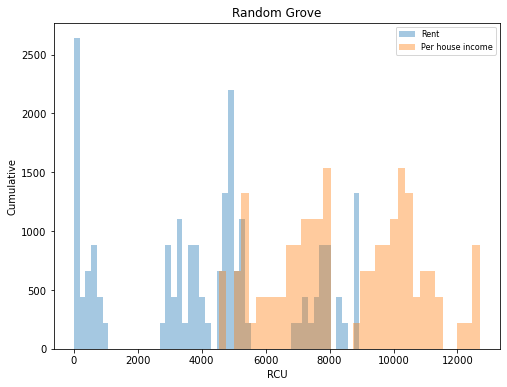

In [29]:
sns.distplot(rg_tot['rent'],  kde=False, label='Rent')
sns.distplot(rg_tot['phi'],  kde=False, label='Per house income')
plt.legend(prop={'size': 8})
plt.title('Random Grove')
plt.xlabel('RCU')
plt.ylabel('Cumulative')


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

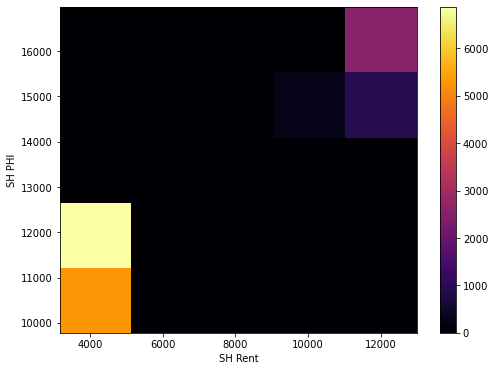

In [30]:
fig, ax = plt.subplots()
h = ax.hist2d(x=sh_tot.rent.tolist(),y=sh_tot.phi.tolist(),cmap='inferno',bins=5)
fig.colorbar(h[3], ax=ax)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

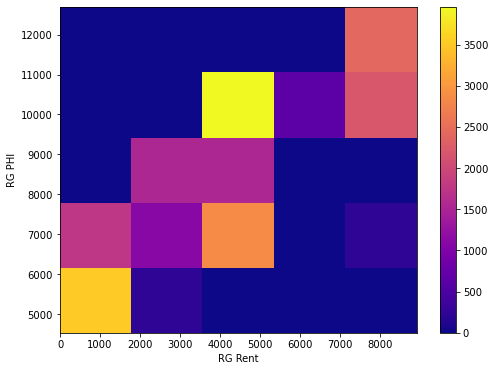

In [31]:
fig, ax = plt.subplots()
h = ax.hist2d(x=rg_tot.rent.tolist(),y=rg_tot.phi.tolist(),cmap='plasma',bins=5)
fig.colorbar(h[3], ax=ax)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

first we remember the definition of variance by:
\begin{align*} \mathbb{Var} &= \mathbb{E}\left[ \left( X-\mathbb{E}[X] \right)^2 \right]
&=\mathbb{E}[X^2] - \mathbb{E}[X]^2. \end{align*} 

and covariance defined as:
$$\mathbb{Cov} = \mathbb{E}\left[ \left( X-\mathbb{E}[X] \right)\left( Y-\mathbb{E}[Y] \right) \right] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]  $$

and we remember linearity of expactations 
\begin{align*} \mathbb{E}\left[ \left(\mathbb{X}+\mathbb{Y}+\mathbb{Z} \right) \right] &= \mathbb{E}[X] + \mathbb{E}[Y]+ \mathbb{E}[Z]
. \end{align*} 

and we will use this identity as well: $(a+b+c)^2 = a^2 +b^2 +c^2 +2ac + 2ab + 2bc$

and now we apply those rules on the variance of $x,y,z$:
$$ Var(X + Y + Z) = \mathbb{E}[(X + Y + Z -E[X+Y+Z])^2]=  $$

$$=  \mathbb{E}[(X + Y + Z -E[X]-E[Y]-E[Z])^2] = \mathbb{E}[((X-E[X]) + (Y-E[Y]) + (Z-E[Z]))^2]=   $$

$$= \mathbb{E}[(X-E[X])^2 + (Y-E[Y])^2 + (Z-E[Z])^2 +2(X-E[X])(Y-E[Y])+2(X-E[X])(Z-E[Z])+2(Y-E[Y])(Z-E[Z])]=   $$

And now we will apply linearity of expactations again such that:
$$\mathbb{E}[(X-E[X])^2+\mathbb{E}[(Y-E[Y])^2+\mathbb{E}[(Z-E[Z])^2+...$$

$$+2\mathbb{E}[(X-E[X])(Y-E[Y])+2\mathbb{E}[(X-E[X])(Z-E[Z])+2\mathbb{E}[(Y-E[Y])(Z-E[Z])=$$

$$=Var(x) + Var(Y) + Var(Z) + 2Cov(X,Y) + 2Cov(X,Z) + 2Cov(Y,Z) $$

when two random variables independent we can say that: $$ \mathbb{E}[XY] = \mathbb{E}[X] * \mathbb{E}[Y]$$

so that the covariance of two independent random variables is: $$\mathbb{Cov} = \mathbb{E}\left[ \left( X-\mathbb{E}[X] \right)\left( Y-\mathbb{E}[Y] \right) \right] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] = \mathbb{E}[X]\mathbb{E}[Y] - \mathbb{E}[X]\mathbb{E}[Y] = 0    $$

**so if  X, Y and Z are independent then:**

$$Cov(X,Z)=Cov(Y,Z)=Cov(X,Z)=0$$

*following the eqution:*

$$ Var(X + Y + Z)=Var(X)+Var(Y)+Var(Z)$$

**but if X & Y are inependent** we still remain with the covariance of x,z and y,z: $$Var(X+Y+Z)=Var(x) + Var(Y) + Var(Z) +  2Cov(X,Z) + 2Cov(Y,Z) $$

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [32]:
def create_s2(fold,m): 
    fold_next = {}
    if len(fold) < 1:
        for key, value in m.items():
            for key2, value2 in m.items():
                if key + key2 in fold_next.keys():
                    fold_next[key + key2] += value * value2
                else:
                    fold_next[key + key2] = value * value2
    else:
        for key, value in fold.items():
            for key2, value2 in m.items():
                if key + key2 in fold_next.keys():
                    fold_next[key + key2] += value * value2
                else:
                    fold_next[key + key2] = value * value2
    return fold_next

def NFoldConv(P , n):
    m = dict(zip(P[0],P[1])) #distribution function. each unique key has his own probability
    Q ={} #assign a dictionary
    if n==2:
        return create_s2(Q,m)
    for i in range(1,n):
        Q = create_s2(Q,m)
    return Q

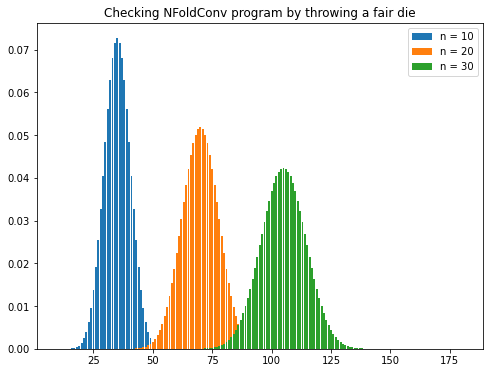

In [33]:
n_10 = NFoldConv([[1,2,3,4,5,6],[1.0/6 for i in range(6)]], 10)
n_20 = NFoldConv([[1,2,3,4,5,6],[1.0/6 for i in range(6)]], 20)
n_30 = NFoldConv([[1,2,3,4,5,6],[1.0/6 for i in range(6)]], 30)
plt.bar([item for item in n_10.keys()],[item for item in n_10.values()],label="n = 10")
plt.bar([item for item in n_20.keys()],[item for item in n_20.values()],label="n = 20")
plt.bar([item for item in n_30.keys()],[item for item in n_30.values()],label="n = 30")
plt.title("Checking NFoldConv program by throwing a fair die")
plt.legend()

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


Text(0.5, 1.0, 'Throwing a fair octahedron 17 times')

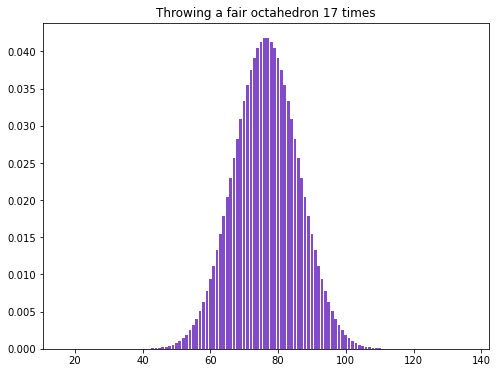

In [34]:
oct = NFoldConv([[1,2,3,4,5,6,7,8],[1.0/8 for i in range(8)]], 17)
plt.bar([item for item in oct.keys()],[item for item in oct.values()],label="n = 17", color=np.random.rand(3))
plt.title("Throwing a fair octahedron 17 times")

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

the distribution of the change is:
          0
-2  0.0900
-1  0.0900
 0  0.1125
 1  0.1350
 2  0.2175
 3  0.1200
 4  0.0975
 5  0.0750
 6  0.0625


Text(0.5, 1.0, 'Change in stock after 2 consecutive days')

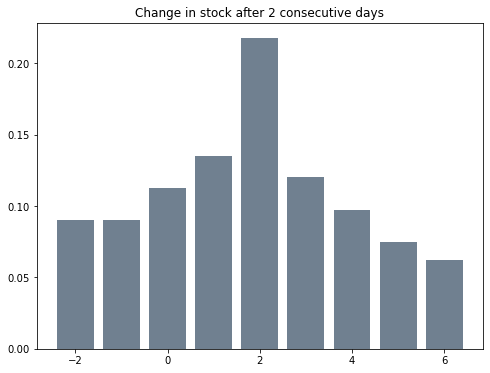

In [35]:
matrix_P = [[-1, 0, 1, 2, 3],[0.3, 0.15, 0.15, 0.15, 0.25]]
stock_2 = NFoldConv(matrix_P, 2)
print("the distribution of the change is:\n",pd.DataFrame.from_dict(stock_2, orient='index'))
plt.bar([item for item in stock_2.keys()],[item for item in stock_2.values()],label="n = 17",color="slategrey")
plt.title("Change in stock after 2 consecutive days")

the distribution of the change is:
             0
-5   0.002430
-4   0.006075
-3   0.012150
-2   0.021262
-1   0.038222
 0   0.053738
 1   0.070748
 2   0.087202
 3   0.104077
 4   0.107198
 5   0.106388
 6   0.099689
 7   0.088608
 8   0.068358
 9   0.051708
 10  0.036357
 11  0.023367
 12  0.012070
 13  0.006445
 14  0.002930
 15  0.000977


Text(0.5, 1.0, 'Change in stock after 5 consecutive days')

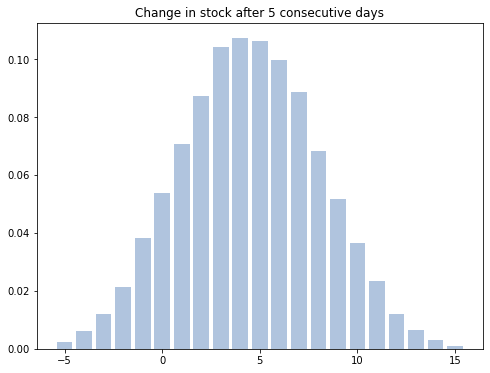

In [36]:
stock_5= NFoldConv(matrix_P, 5)
print("the distribution of the change is:\n",pd.DataFrame.from_dict(stock_5, orient='index'))
plt.bar([item for item in stock_5.keys()],[item for item in stock_5.values()],label="n = 17",color="lightsteelblue")
plt.title("Change in stock after 5 consecutive days")

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [37]:
def probability_stock(matrix,days,gain,lost):
    NFoldConv_days = NFoldConv(matrix, days)
    dict_p={"probability_bigger":0,"probability_lower":0}
    for j in NFoldConv_days:
        if int(j)>gain:
            dict_p["probability_bigger"] += NFoldConv_days[j]
        if int(j)<lost:
            dict_p["probability_lower"] += NFoldConv_days[j]
    print("the probability that the stock has gained strictly more than 7NIS after 5 days: {0}\nthe probability that the stock has  lost strictly more than 4NIS: {1}".format(dict_p["probability_bigger"],dict_p["probability_lower"]))
probability_stock(matrix_P,5,7,-4)

the probability that the stock has gained strictly more than 7NIS after 5 days: 0.202211875
the probability that the stock has  lost strictly more than 4NIS: 0.00243
